In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

from sklearn.metrics import r2_score
from scipy.stats import pearsonr

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_excel('Dataset/Linear Regression.xlsx')
df.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [3]:
df.shape

(21613, 5)

### Checking information of dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  int64  
 1   sqft_living  21613 non-null  int64  
 2   bedrooms     21613 non-null  int64  
 3   bathrooms    21613 non-null  float64
 4   floors       21613 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 844.4 KB


### Checking null values

In [5]:
df.isnull().sum()

price          0
sqft_living    0
bedrooms       0
bathrooms      0
floors         0
dtype: int64

In [6]:
df.describe()

,price,sqft_living,bedrooms,bathrooms,floors
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2079.899736,3.370842,2.114757,1.494309
std,3.671272e+05,918.440897,0.930062,0.770163,0.539989
min,7.500000e+04,290.000000,0.000000,0.000000,1.000000
25%,3.219500e+05,1427.000000,3.000000,1.750000,1.000000
50%,4.500000e+05,1910.000000,3.000000,2.250000,1.500000
75%,6.450000e+05,2550.000000,4.000000,2.500000,2.000000
max,7.700000e+06,13540.000000,33.000000,8.000000,3.500000


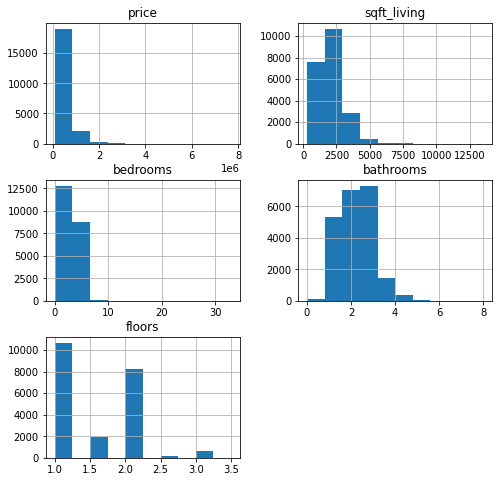

In [7]:
df.hist(figsize=(8,8))
plt.show()

### Inference from Histogram:

    Bathrooms is Unimodal and  has negative Skewness ie Mean < Median
    Bedrooms is  Unimodal and has positive Skewness ie Mean > Median
    Price is Unimodal and has positive Skewness ie Mean > Median
    Sqft_living is Unimodal and has positive Skewness ie Mean > Median
    Floors is Multimodal 

## EDA

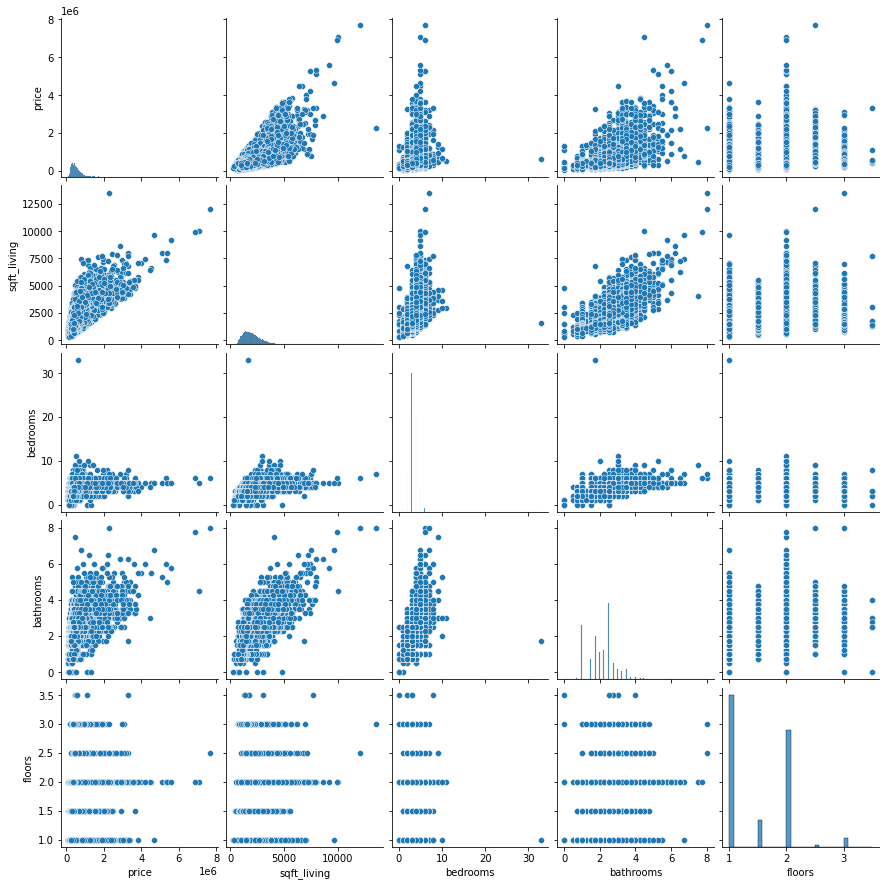

In [8]:
sns.pairplot(df)

### Finding Outliers using Boxplot

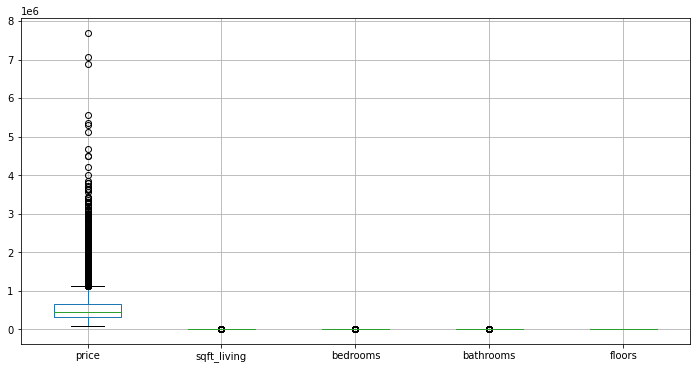

In [9]:
df.boxplot(figsize=(12,6))
plt.show()

<AxesSubplot:xlabel='price'>

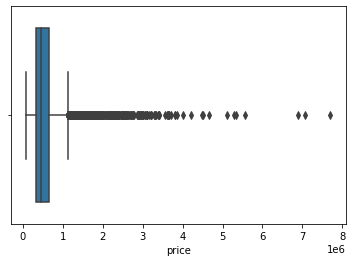

In [10]:
sns.boxplot(df['price'])

<AxesSubplot:xlabel='sqft_living'>

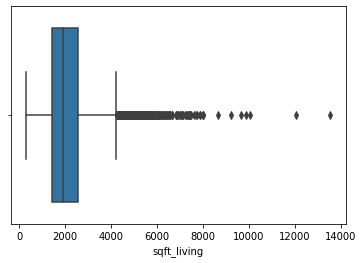

In [11]:
sns.boxplot(df['sqft_living'])

<AxesSubplot:xlabel='bedrooms'>

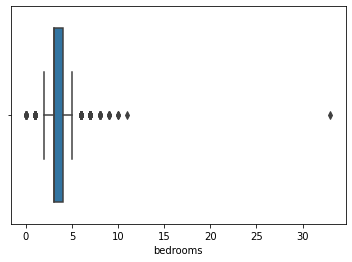

In [12]:
sns.boxplot(df['bedrooms'])

<AxesSubplot:xlabel='bathrooms'>

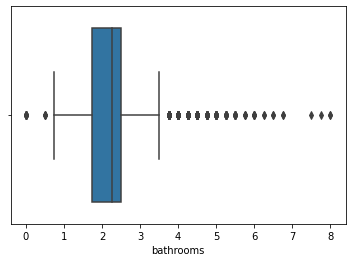

In [13]:
sns.boxplot(df['bathrooms'])

<AxesSubplot:xlabel='floors'>

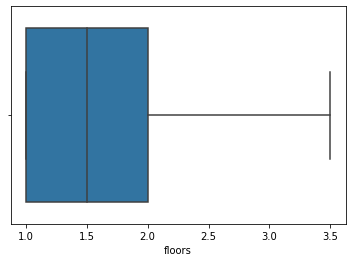

In [14]:
sns.boxplot(df['floors'])

### Inference from Boxplot
    The Dependent Variable (Price) has many Outliers
    Square feet Living has many Outliers
    Bedrooms has Moderate Outliers but It also include an Extreme Outlier(which can be removed from dataset)
    Bathroms has Moderate Outliers 
    Floors has No Outlier

### Correlation Matrix

<AxesSubplot:>

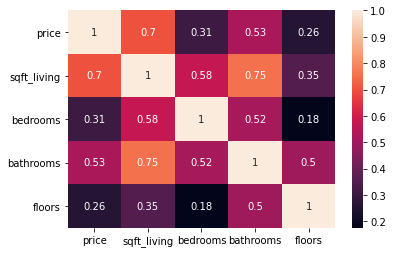

In [15]:
sns.heatmap(df.corr(),annot=True)

### Inference from Correlation Matrix:
The Target variable 'price' has :
* **Strong correlation** with area of living in **square feet**
* **Moderate correlation** with number of **bathrooms and bedrooms**
* almost **No correlation** with number of **floors**.

# Applying Linear Regression

* Target Variable is Price which is a Continous Variable 

### Model 1


### Price V/S  area of living in square feet (sqft_living)

where Price is Dependent Variable and sqft_living is Independent Variable

In [16]:
df.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [17]:
x = df.iloc[:,1:2]
x.head()

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680


In [18]:
y = df.iloc[:,:1]
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


### Spliting Dataset into Training and Test Set

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

### Fitting Linear Model :

In [20]:
lin_reg.fit(x_train, y_train)

LinearRegression()

### Framing Equation

In [21]:
print("Intercept is: ", lin_reg.intercept_)
print("Coefficient is: ", lin_reg.coef_)

Intercept is:  [-41947.45007397]
Coefficient is:  [[279.51011494]]


**Equation is:** 

**price  =   - 41947.45007397 + 279.51011494 (sqft_living)**

<hr>

### Predicting Values

In [22]:
ypred = lin_reg.predict(x_test)
print("Predicted values:\n")
print(ypred)

Predicted values:

[[ 536638.48784377]
 [ 768631.88324074]
 [1011805.68323515]
 ...
 [ 279489.18210255]
 [ 556204.1958893 ]
 [ 659622.93841566]]


### Calculating R-square value

In [23]:
print("r square value is: ", r2_score(y_test, ypred))

r square value is:  0.48388318901296545


### Calculating p value

In [24]:
stats, p = pearsonr(df.price, df.sqft_living)
print('The r value is {} and p value is {}'.format(stats,p))

The r value is 0.7020350524336834 and p value is 0.0


### Inference from Model1:
* R-square value is 0.48 suggesting that only about 48% of the variance in the target variable.
* p value is 0.0 which is less than 0.05 ie sqft_living is affecting Price of House

### Model 2
### Price V/S  Bedrooms

where Price is Dependent Variable and Bedrooms is Independent Variable

In [25]:
x1 = df.iloc[:,2:3]
x1.head()

,bedrooms
0,3
1,3
2,2
3,4
4,3


In [26]:
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


### Spliting Dataset into Training and Test Set

In [27]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size=0.3, random_state = 2)

### Fitting Linear Model :

In [28]:
lin_reg.fit(x1_train, y1_train)

LinearRegression()

### Framing Equation

In [29]:
print("Intercept is: ", lin_reg.intercept_)
print("Coefficient is: ", lin_reg.coef_)

Intercept is:  [142835.36507297]
Coefficient is:  [[118301.95858814]]


**Equation is:** 

**price  =   142835.36507296 + 118301.95858814 (bedrooms)**

<hr>

### Predicting Values

In [30]:
y_pred1 = lin_reg.predict(x1_test)
print("Predicted values:\n")
print(y_pred1)

Predicted values:

[[616043.19942552]
 [497741.24083738]
 [379439.28224925]
 ...
 [616043.19942552]
 [497741.24083738]
 [616043.19942552]]


### Calculating R-square value

In [31]:
print("The r square value is: ", r2_score(y1_test, y_pred1))

The r square value is:  0.10373065781231217


### Calculating p value

In [32]:
stats, p = pearsonr(df.price, df.bedrooms)
print('The r value is {} and p value is {}'.format(stats,p))

The r value is 0.3083495978848184 and p value is 0.0


### Inference from Model2:
* R-square value is 0.10 suggesting that only about 10% of the variance in the target variable.
* p value is 0.0 which is less than 0.05 ie bedrooms is affecting Price of House

### Model 3
### Price V/S  Bathrooms

where Price is Dependent Variable and Bathrooms is Independent Variable

In [33]:
x2 = df.iloc[:,3:4]
x2.head()

,bathrooms
0,1.00
1,2.25
2,1.00
3,3.00
4,2.00


In [34]:
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


### Spliting Dataset into Training and Test Set

In [35]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y,test_size=0.3,random_state=2)

### Fitting Linear Model :

In [36]:
lin_reg.fit(x2_train,y2_train)

LinearRegression()

### Framing Equation

In [37]:
print("Intercept is: ", lin_reg.intercept_)
print("Coefficient is: ", lin_reg.coef_)

Intercept is:  [13513.13889574]
Coefficient is:  [[249375.03130974]]


#### Equation is: 

#### price  =   13513.13889573 + 249375.03130974 (bathrooms)

### Predicting Values

In [38]:
y_pred2=lin_reg.predict(x2_test)
print("Predicted values:\n")
print(y_pred2)

Predicted values:

[[574606.95934264]
 [387575.68586034]
 [262888.17020547]
 ...
 [636950.71717008]
 [574606.95934264]
 [449919.44368778]]


### Calculating R-square value

In [39]:
print("The r square value is: ", r2_score(y2_test, y_pred2))

The r square value is:  0.272969002399155


### Calculating p value

In [40]:
stats, p = pearsonr(df.price, df.bathrooms)
print('The r value is {} and p value is {}'.format(stats,p))

The r value is 0.525137504579605 and p value is 0.0


### Inference from Model3:

<hr>

* R-square value is 0.27 suggesting that only about 27% of the variance in the target variable.
* p value is 0.0 which is less than 0.05 ie bathrooms is affecting Price of House

### Model 4
### Price V/S  Floors

where Price is Dependent Variable and floors is Independent Variable

In [41]:
x3 = df.iloc[:,4:]
x3.head()

,floors
0,1.0
1,2.0
2,1.0
3,1.0
4,1.0


In [42]:
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


### Spliting Dataset into Training and Test Set

In [43]:
x3_train,x3_test,y3_train,y3_test=train_test_split(x3,y,test_size=0.3,random_state=2)

### Fitting Linear Model :

In [44]:
lin_reg.fit(x3_train,y3_train)

LinearRegression()

### Framing Equation

In [45]:
print("Intercept is: ", lin_reg.intercept_)
print("Coefficient is: ", lin_reg.coef_)

Intercept is:  [283855.89650181]
Coefficient is:  [[171935.92961605]]


#### Equation is:
#### price  =   283855.89650181 + 171935.92961605 (floors)
### Predicting Values

In [46]:
y_pred3 =lin_reg.predict(x3_test)
print("Predicted values:\n")
print(y_pred3)

Predicted values:

[[541759.79092589]
 [455791.82611786]
 [455791.82611786]
 ...
 [627727.75573391]
 [627727.75573391]
 [541759.79092589]]


### Calculating R-square value

In [47]:
print("The r square value is: ", r2_score(y3_test, y_pred3))

The r square value is:  0.06879667978104287


### Calculating p value

In [48]:
stats, p = pearsonr(df.price, df.floors)
print('The r value is {} and p value is {}'.format(stats,p))

The r value is 0.2567938840633401 and p value is 1.6e-322


### Inference from Model4:
* R-square value is 0.06 suggesting that only about 6% of the variance in the target variable.
* p value is 1.6e-322 which is less than 0.05 ie floors is affecting Price of House

### Model 5
### Price as Dependent Variable and all Other Variables as Independent Variable

In [49]:
x4 = df.drop(['price'], axis=1)
x4.head()

,sqft_living,bedrooms,bathrooms,floors
0,1180,3,1.00,1.0
1,2570,3,2.25,2.0
2,770,2,1.00,1.0
3,1960,4,3.00,1.0
4,1680,3,2.00,1.0


In [50]:
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


### Spliting Dataset into Training and Test Set

In [51]:
x4_train,x4_test,y4_train,y4_test=train_test_split(x4,y,test_size=0.3,random_state=2)

### Fitting Linear Model :

In [52]:
lin_reg.fit(x4_train,y4_train)

LinearRegression()

### Framing Equation

In [53]:
print("Intercept is: ", lin_reg.intercept_)
print("Coefficient is: ", lin_reg.coef_)

Intercept is:  [73808.86183529]
Coefficient is:  [[   306.72838252 -55720.77178327   8705.50888837   -266.52957882]]


#### Equation is:

#### price  = 73808.86183529 + 306.72838252(sqft_living) - 55720.77178327(bedrooms) + 8705.50888837(bathrooms) - 266.52957882(floors)

### Predicting Values

In [54]:
y_pred4 = lin_reg.predict(x4_test)
print("Predicted values:\n")
print(y_pred4)

Predicted values:

[[609328.77721079]
 [585038.87031192]
 [415562.45223517]
 ...
 [599102.75434259]
 [339784.19873135]
 [516024.79183523]]


### Calculating R-square value

In [55]:
print("The r square value is: ", r2_score(y4_test, y_pred4))

The r square value is:  0.5105722437453337


### Inference from Model5:
    R-square value is 0.51 suggesting that only about 51% of the variance in the target variable.